In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [18]:
# Configure the theme
sns.set_theme()

In [19]:
# Helper function
def get_clantats_by_mode(mode_id: int, players: DataFrame, to_insert: DataFrame):
    for clantag in players.keys():
        temp = {'clantag': clantag, 'total_battles': players[clantag][f'battles_in_{mode_id}'].sum(), 'players': len(players[clantag].index)}
        temp['average_battles'] = temp['total_battles'] / temp['players']
        to_insert = to_insert.append(temp, ignore_index=True)
    return to_insert

In [20]:
data = pd.read_csv('csvs/dataset_for_pve.csv')

In [21]:
# Base dataframe
dataframe = DataFrame(data, columns=['nickname', 'battles_in_0','spotting_in_0', 'kills_in_0', 'dmg_in_0', 'winrate_in_0', 'battles_in_1','dmg_in_1','winrate_in_1', 'clantag', 'spotting_in_1', 'kills_in_1','is_stats_closed'])

_________________

### Данные о датасете

In [22]:
dataframe.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000
mean,2042.038748,357.312284,0.684912,1329.587774,47.265274,1852.907622,8257.195866,76.796373,2005.558105,5.520543
std,4242.481662,171.497974,0.468042,925.889823,12.918800,3340.816251,5345.407481,17.274762,1163.370428,2.049892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,255.267131,0.360000,691.712500,44.900000,76.000000,4018.975000,72.100000,1174.399123,4.330000
50%,360.500000,338.409247,0.610000,1121.465000,48.500000,502.000000,7332.860000,79.500000,1860.455428,5.650000
75%,1879.000000,447.522809,0.930000,1733.510000,51.900000,2047.250000,11836.057500,85.700000,2711.082332,6.870000
max,52757.000000,2184.500000,6.000000,9221.800000,100.000000,45041.000000,38845.020000,100.000000,9855.333333,20.440000


_________________

### Дистрибуция игроков по боям(все игроки из выборки)

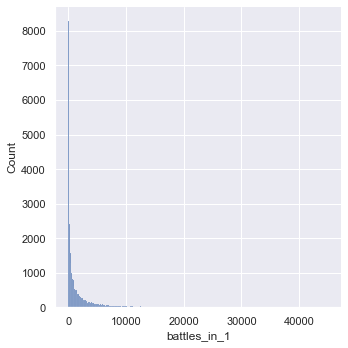

In [23]:
sns.displot(data=dataframe, x='battles_in_1')

### Дистрибуция игроков по урону(все игроки из выборки)

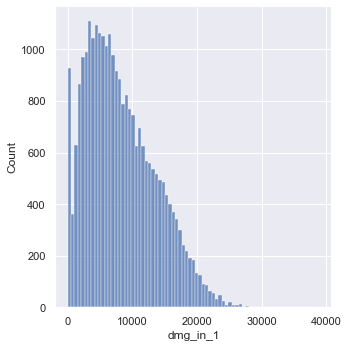

In [24]:
sns.displot(data=dataframe, x='dmg_in_1')

### Дистрибуция игроков по винрейту(все игроки из выборки)

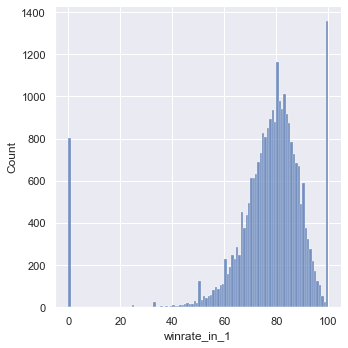

In [25]:
sns.displot(data=dataframe, x='winrate_in_1')

_________________

### Топ игроков по количеству боёв

In [26]:
dataframe.sort_values('battles_in_1', ascending=False).head(10)[['clantag', 'nickname', 'battles_in_1', 'dmg_in_1', 'winrate_in_1', 'kills_in_1']]

,clantag,nickname,battles_in_1,dmg_in_1,winrate_in_1,kills_in_1
5358,H0TS,katzz,45041.0,19107.45,94.0,8.69
5739,Араб,m920,39455.0,13462.27,91.7,6.17
8543,FORC1,Штормсс260р,35950.0,15005.40,82.4,6.41
2749,RusTD,boroda71,35030.0,12470.11,86.0,5.73
24598,B_P,Котофей_Иваныч,34849.0,16791.63,85.2,8.54
5636,ВекХХ,oSTALKERo,34685.0,17187.70,88.1,8.63
8849,1PZBH,jonn,34639.0,9712.86,86.2,6.28
19089,VE_DI,silps,34113.0,19965.53,93.9,8.59
5012,Goal,Lisovski2015,33627.0,12423.83,93.9,7.50
10027,ИВЛ,boroda957,32514.0,16120.97,89.0,7.61


_________________

### *Подготовка данных по альянсам*

In [27]:
clantags = dataframe.clantag.unique()
players = {}

In [28]:
for clantag in clantags:
    players[clantag] = dataframe.loc[dataframe['clantag'] == clantag]

In [29]:
clans_stats = pd.DataFrame(columns=['clantag', 'total_battles', 'players', 'average_battles'])

In [30]:
clans_stats = get_clantats_by_mode(1, players, clans_stats)

<ipython-input-19-b854750d844c>:5: RuntimeWarning: invalid value encountered in double_scalars
  temp['average_battles'] = temp['total_battles'] / temp['players']


In [31]:
clans_stats.describe()

,total_battles,average_battles
count,2000.000000,1999.000000
mean,22283.456500,2075.297306
std,44383.221036,3063.753388
min,0.000000,0.000000
25%,585.750000,221.000000
50%,4528.000000,930.782609
75%,21354.000000,2671.991684
max,488395.000000,34639.000000


In [32]:
sorted_df_avg = clans_stats.sort_values('average_battles', ascending=False)
sorted_df_avg_fitred_more_15_players = sorted_df_avg.loc[sorted_df_avg['players'] >= 15]

_________________

# ТОПы кланов по дамагу, винрейту и боям

### Топ кланов по среднему количеству боёв в PvE
Черная линия — среднее значение по кланам из датасета(Только по тем, число бойцов которых превышает 15 человек)

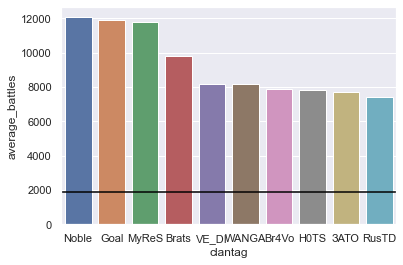

In [33]:
sorted_df_avg_fitred_more_15_players_top_10_players = sorted_df_avg_fitred_more_15_players.head(10)

top_clans_ = sns.barplot(x=sorted_df_avg_fitred_more_15_players_top_10_players['clantag'], y=sorted_df_avg_fitred_more_15_players_top_10_players['average_battles'], label='Average PvE battles per clan' )
hor_line = top_clans_.axhline(y=sorted_df_avg_fitred_more_15_players['average_battles'].mean(), c='black', animated=True)
hor_line.set_label('Average value for dataset')

In [34]:
# В виде таблички
sorted_df_avg_fitred_more_15_players_top_10_players.head(10)

,clantag,total_battles,players,average_battles
221,Noble,253413.0,21,12067.285714
220,Goal,178798.0,15,11919.866667
206,MyReS,294233.0,25,11769.320000
233,Brats,382423.0,39,9805.717949
665,VE_DI,130788.0,16,8174.250000
54,WANGA,122456.0,15,8163.733333
1008,Br4Vo,142062.0,18,7892.333333
240,H0TS,312400.0,40,7810.000000
212,ЗАТО,215713.0,28,7704.035714
57,RusTD,488395.0,66,7399.924242


### Топ кланов по общему количеству боев в PvE

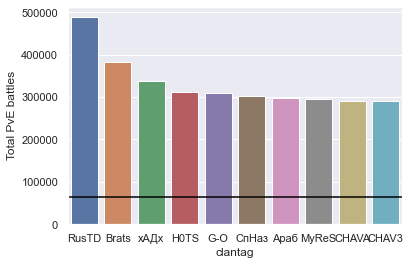

In [35]:
sorted_total_battles = sorted_df_avg_fitred_more_15_players.sort_values('total_battles', ascending=False).head(10)

top_clans_by_total_battles_plot = sns.barplot(x=sorted_total_battles['clantag'], y=sorted_total_battles['total_battles'], label='Total PvE battles per clan')
top_clans_by_total_battles_plot.set_ylabel('Total PvE battles')
hor_line_total_battles = top_clans_by_total_battles_plot.axhline(y=sorted_df_avg_fitred_more_15_players['total_battles'].mean(), c='black', animated=True)
hor_line_total_battles.set_label('Average value for dataset')

In [36]:
sorted_total_battles.head(10)

,clantag,total_battles,players,average_battles
57,RusTD,488395.0,66,7399.924242
233,Brats,382423.0,39,9805.717949
53,хАДх,338323.0,72,4698.930556
240,H0TS,312400.0,40,7810.000000
91,G-O,309940.0,49,6325.306122
237,СпНаз,302074.0,45,6712.755556
252,Араб,298516.0,56,5330.642857
206,MyReS,294233.0,25,11769.320000
125,CHAVA,290109.0,72,4029.291667
201,CHAV3,289704.0,62,4672.645161


In [37]:
player_that_have_more_than_1k_battles_in_pve = dataframe.loc[(dataframe['battles_in_0'] > 100) & (dataframe['battles_in_1'] > 100)]
player_that_have_more_than_1k_battles_in_pve.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000
mean,3286.592163,407.827513,0.752766,1573.825760,49.410314,2788.348133,10464.144359,76.928795,2491.468679,6.116058
std,5106.886064,149.283961,0.421526,948.728109,5.001198,3885.865377,4999.884973,9.130120,1046.910993,1.670872
min,101.000000,19.670846,0.010000,39.650000,27.700000,101.000000,125.470000,5.400000,86.358779,0.300000
25%,380.000000,299.463863,0.440000,872.962500,46.400000,446.000000,6480.110000,71.700000,1716.059345,5.007500
50%,1232.500000,380.425081,0.690000,1351.715000,49.100000,1296.000000,9938.080000,78.000000,2367.540716,6.150000
75%,3888.000000,493.970845,0.990000,2070.260000,51.900000,3459.500000,14043.740000,83.400000,3116.759111,7.230000
max,51652.000000,1555.478197,4.470000,6506.210000,99.400000,45041.000000,38845.020000,99.400000,8577.955142,15.700000


_________________

# Отфильтрованная статистика(игроки, отыгравшие более 100 боев в PvP и PvE

Отфильровав людей, отыгравших менее ста боев в PvP и PvE режимах, у нас осталось 14572 игроков из первоначальных 26609

### Дистрибуция игроков по боям(battles in PvE > 100 & battles in PvP > 100)

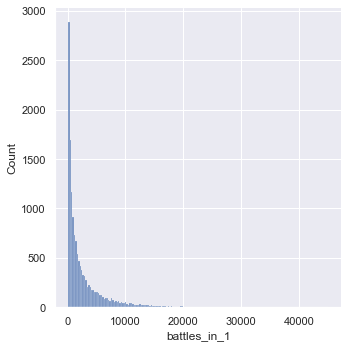

In [42]:
sns.displot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1')

### Дистрибуция игроков по урону(battles in PvE and PvP > 100)

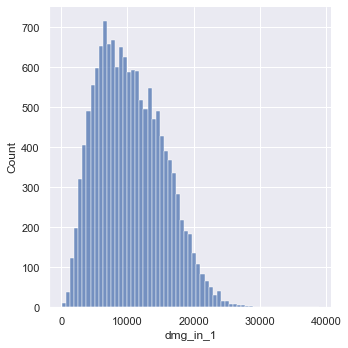

In [43]:
sns.displot(data=player_that_have_more_than_1k_battles_in_pve, x='dmg_in_1')

### Корреляция урона в PvP от урона в PvE

Text(0, 0.5, 'Damage in PvP')

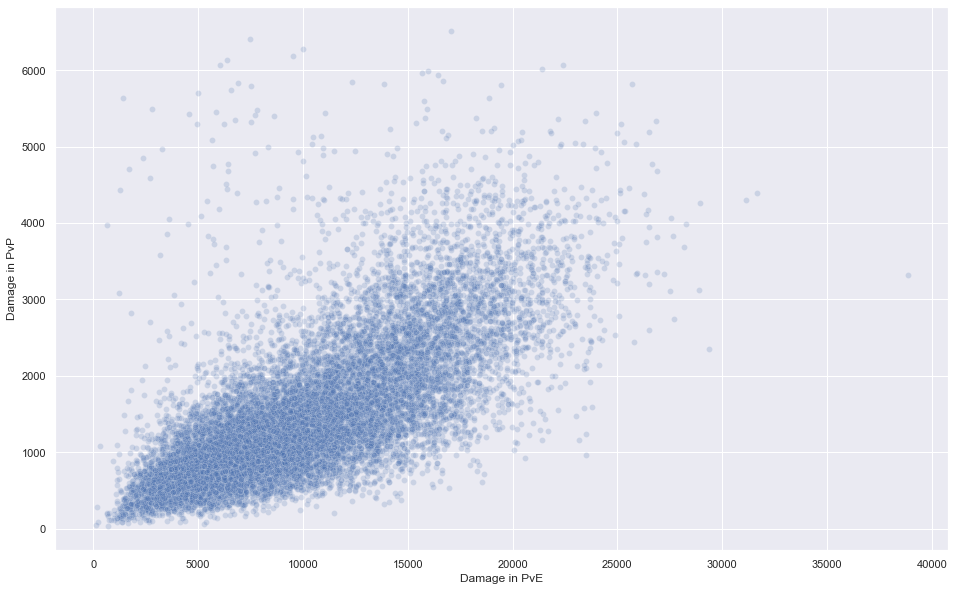

In [46]:
plt.figure(figsize=(16, 10))
damage_plot = sns.scatterplot(x=player_that_have_more_than_1k_battles_in_pve['dmg_in_1'], y=player_that_have_more_than_1k_battles_in_pve['dmg_in_0'], alpha=0.2)
damage_plot.set_xlabel('Damage in PvE')
damage_plot.set_ylabel('Damage in PvP')

*Как не трудно заметить, есть игроки, показывающие выдающиеся значения урона в PvP, но имеющие очень низкий урона в PvE.Давайте посмотрим на цифры, чтобы понять с чем это может быть связано*

In [49]:
low_pve_dmg_and_high_pvp_dmg = player_that_have_more_than_1k_battles_in_pve.loc[(player_that_have_more_than_1k_battles_in_pve['dmg_in_1'] < 15000) & (player_that_have_more_than_1k_battles_in_pve['dmg_in_0'] > 5000)]
low_pve_dmg_and_high_pvp_dmg.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000,28.000000,28.000000,28.000000,28.000000
mean,5726.285714,807.438976,1.783929,5585.196429,64.257143,1224.00000,7807.099643,46.132143,1334.349192,3.431429
std,4973.043750,167.662806,0.227797,378.060002,3.610317,1036.43152,3056.345722,15.603467,468.862208,1.236865
min,109.000000,492.127660,1.260000,5033.810000,56.300000,119.00000,1426.400000,20.100000,355.935570,0.780000
25%,2627.250000,735.515082,1.645000,5310.495000,62.000000,395.50000,5988.242500,33.650000,1082.606764,2.645000
50%,4696.500000,815.936407,1.770000,5463.825000,64.100000,1035.50000,7512.050000,46.800000,1257.551633,3.385000
75%,6897.500000,882.703170,1.917500,5823.680000,66.925000,1498.50000,10096.525000,58.200000,1625.928070,4.017500
max,24167.000000,1156.226481,2.250000,6405.800000,71.600000,4987.00000,14148.920000,74.100000,2482.117647,6.840000


In [50]:
low_pve_dmg_and_high_pvp_dmg

,nickname,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,clantag,spotting_in_1,kills_in_1,is_stats_closed
1,master_windy,4154.0,692.236399,1.90,6131.09,68.2,1106.0,6361.23,44.8,ORL,1132.311935,3.82,False
2,VENI_VIDI_VlCI,6545.0,823.406112,1.77,5346.09,69.4,2559.0,6768.75,44.2,ORL,1163.618601,3.82,False
6,DeadL1ne,6983.0,951.360304,1.69,5294.82,64.2,1413.0,4949.76,20.1,NaN,923.068648,2.13,False
7,iisys,6354.0,834.409348,1.70,5419.52,69.5,2277.0,4586.67,39.9,ORL,719.783048,2.63,False
20,Ежег_в_Тумане,109.0,788.192661,1.85,5639.94,71.6,745.0,1426.40,30.5,ORL,355.935570,0.78,False
74,Alekxander008,4325.0,967.986821,1.75,5141.32,63.7,300.0,10886.18,55.3,PAND,2101.376667,4.84,False
75,You_Know_Me,6869.0,1018.186927,2.02,5789.56,64.5,1713.0,7528.58,31.7,PAND,1453.460012,3.27,False
93,King_Orgasmus,3797.0,811.501712,1.77,5849.17,66.1,414.0,12327.17,48.8,PAND,1798.727053,4.89,False
101,pixel_blender,6350.0,839.536693,1.59,5398.76,63.4,1193.0,8614.03,35.6,R7GEx,1383.942163,3.87,False
113,Ostin000,5068.0,787.167324,1.60,5033.81,63.6,981.0,10437.55,58.8,BAYAN,1770.320082,4.66,False


*Ага, баянчики, орлики, изики. Всё понятно. Думаю, даже дураку понятно, что эти ребята не могут плохо играть в ПвЕ, только если они специально не выходят из боя. А если мы вспомним времена первого марафона, а именно абуз выхода из боя и получения монет, то всё встает на свои места*

#### Градиентный график

На градиентном графике, таких аномалий нет, поэтому предлагаю к нему и обратиться

Text(0, 0.5, 'Damage in PvP')

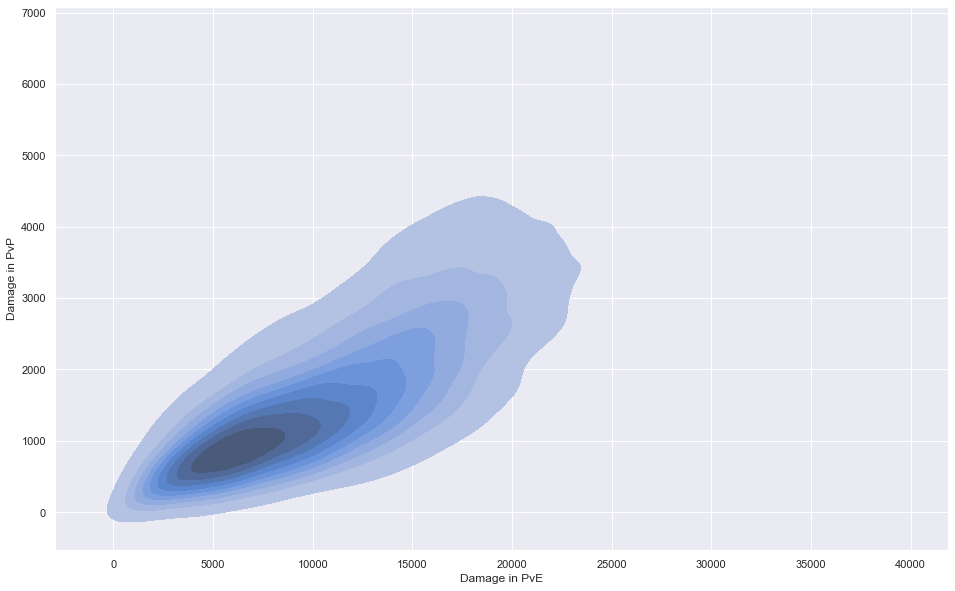

In [51]:
plt.figure(figsize=(16, 10))
dmg = sns.kdeplot(data=player_that_have_more_than_1k_battles_in_pve,x='dmg_in_1', y='dmg_in_0', fill=True, common_grid=True)
dmg.set_xlabel('Damage in PvE')
dmg.set_ylabel('Damage in PvP')

#### Регрессионная линия 

Для более точного моделирования, удалим из данных "аномальные" строки, связанные с абузом ЧО.

Text(0, 0.5, 'Damage in PvP')

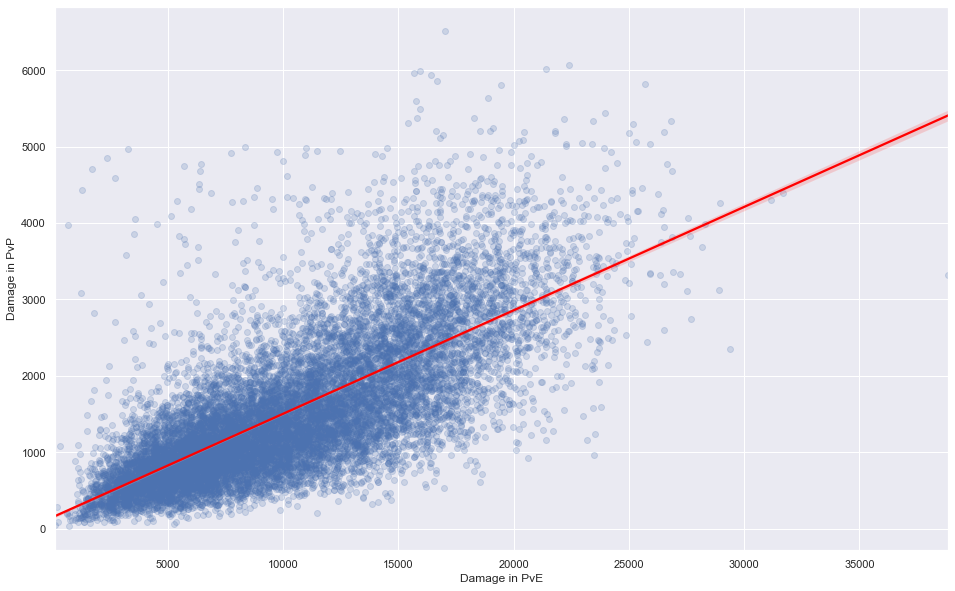

In [53]:
plt.figure(figsize=(16, 10))
dataset_with_deleted_abusers = player_that_have_more_than_1k_battles_in_pve.drop(low_pve_dmg_and_high_pvp_dmg.index)
regressions_plot_pve_pvp_damages = sns.regplot(data=dataset_with_deleted_abusers,x='dmg_in_1', y='dmg_in_0',scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
regressions_plot_pve_pvp_damages.set_xlabel('Damage in PvE')
regressions_plot_pve_pvp_damages.set_ylabel('Damage in PvP')

### Корреляция винрейта в PvP от винрейта в PvE

Text(0, 0.5, 'Winrate in PvP')

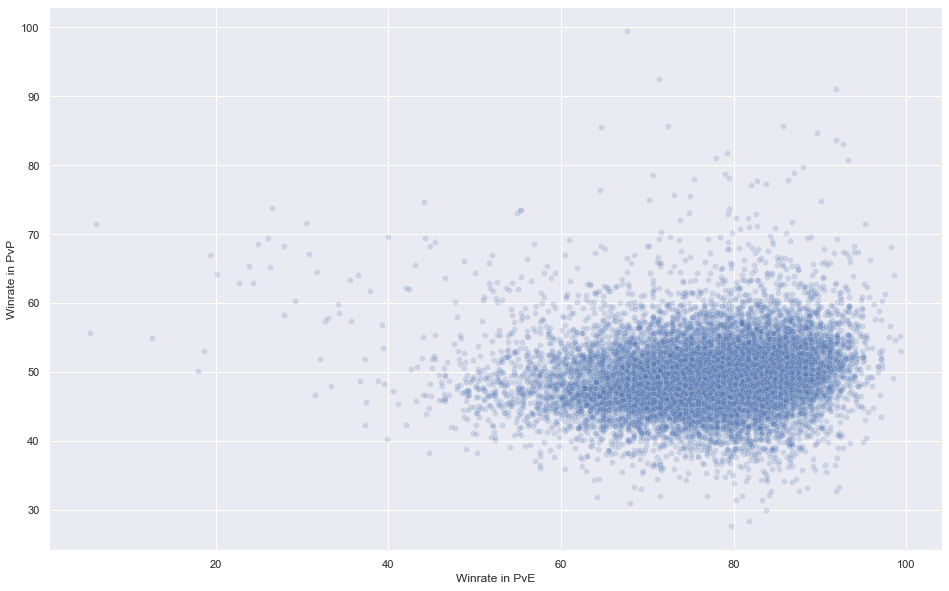

In [54]:
plt.figure(figsize=(16, 10))
winrate_plot = sns.scatterplot(data=player_that_have_more_than_1k_battles_in_pve, x='winrate_in_1', y='winrate_in_0',  alpha=0.2)
winrate_plot.set_xlabel('Winrate in PvE')
winrate_plot.set_ylabel('Winrate in PvP')

*Опять таки, очень заметен абуз: Обратите внимание на Левую грань графика - там кучка игроков с высоким для PvP винрейтом, но очень низким WR для PvE*

#### Градиентный график

Text(0, 0.5, 'Winrate in PvP')

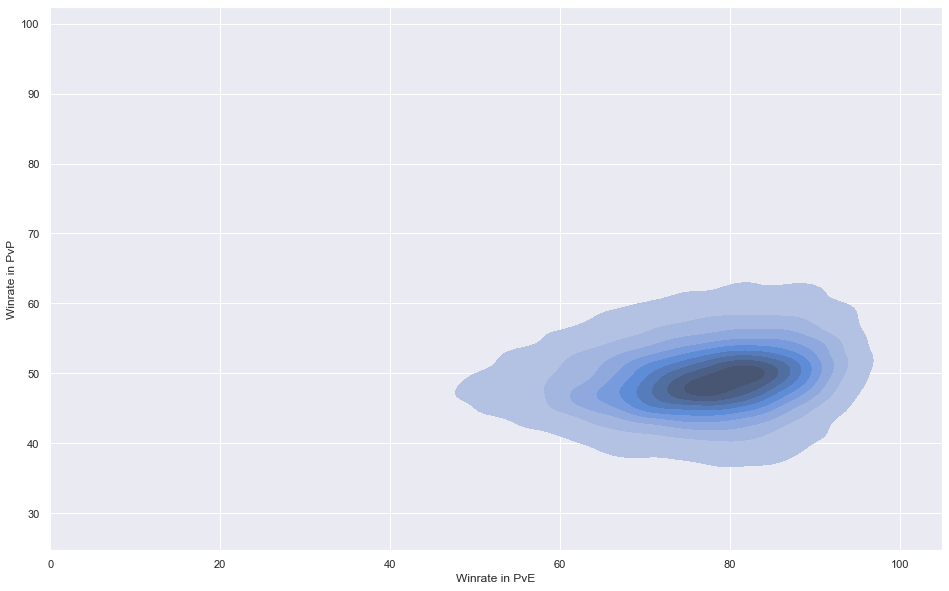

In [55]:
plt.figure(figsize=(16, 10))
wr_gradient_plot = sns.kdeplot(data=player_that_have_more_than_1k_battles_in_pve, x='winrate_in_1', y='winrate_in_0', fill=True, common_grid=True)
wr_gradient_plot.set_xlabel('Winrate in PvE')
wr_gradient_plot.set_ylabel('Winrate in PvP')

*Обратимся к KDE-графику, дабы сгладить крайние точки и посмотреть на средние значения*

In [56]:
player_that_have_more_than_1k_battles_in_pve.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000
mean,3286.592163,407.827513,0.752766,1573.825760,49.410314,2788.348133,10464.144359,76.928795,2491.468679,6.116058
std,5106.886064,149.283961,0.421526,948.728109,5.001198,3885.865377,4999.884973,9.130120,1046.910993,1.670872
min,101.000000,19.670846,0.010000,39.650000,27.700000,101.000000,125.470000,5.400000,86.358779,0.300000
25%,380.000000,299.463863,0.440000,872.962500,46.400000,446.000000,6480.110000,71.700000,1716.059345,5.007500
50%,1232.500000,380.425081,0.690000,1351.715000,49.100000,1296.000000,9938.080000,78.000000,2367.540716,6.150000
75%,3888.000000,493.970845,0.990000,2070.260000,51.900000,3459.500000,14043.740000,83.400000,3116.759111,7.230000
max,51652.000000,1555.478197,4.470000,6506.210000,99.400000,45041.000000,38845.020000,99.400000,8577.955142,15.700000


****

### Гистограмма винрейта в PvE(учитываются игроки, которые отыграли более 100 боёв в PvE И в PvP)

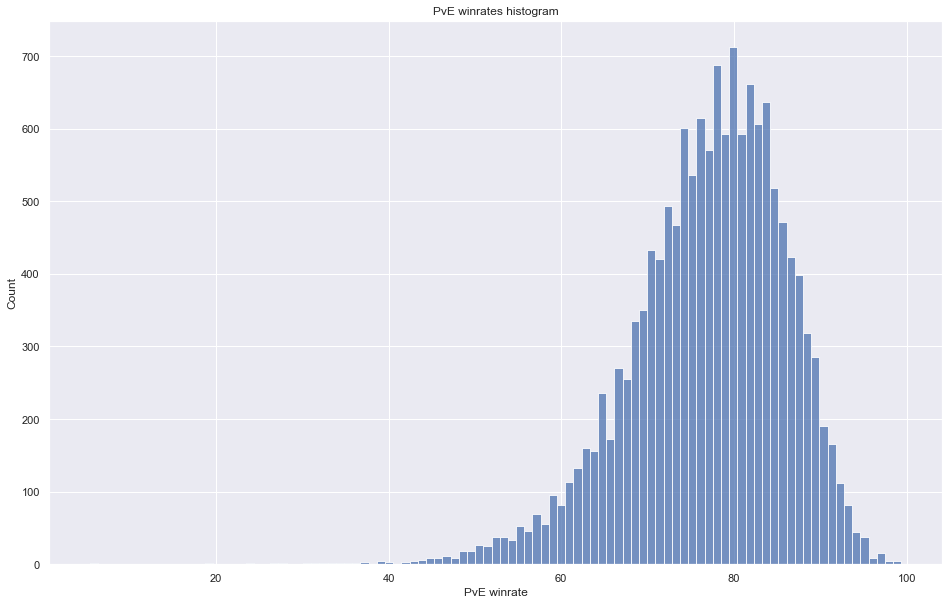

In [57]:
plt.figure(figsize=(16, 10))
wr_pve_hist = sns.histplot(data=player_that_have_more_than_1k_battles_in_pve, x='winrate_in_1')
wr_pve_hist.set_title('PvE winrates histogram')
wr_pve_hist.set_xlabel('PvE winrate')
wr_pve_hist.grid(True)

*Нетрудно заметить, что график примерно соотвествует графику нормального распределения*

#### По KDE-графику и гистограмме распределения винрейтов, мы можем сделать вывод о том, что среднестатистический игрок, отыгравший в PvE более 1000 боев будет иметь что-то около 80% винрейта.

Давайте обратимся к цифрам, чтобы подтвердить или опровергнуть этот довод

In [48]:
player_that_have_more_than_1k_battles_in_pve['winrate_in_1'].mean()

76.92879494921768

Ну, с грубым округлением там и будет 80% побед. *Замечу, что это средний винрейт с учетом абузеров ЧО*

А теперь посмотрим на среднее значение без учета абузеров:


In [49]:
dataset_with_deleted_abusers['winrate_in_1'].mean()

76.98808443344335

Нууу, вполне ожидаемо, что показатель почти не изменился: удаление 28 человек несильно повлияет на датасет размером в 14000 записей

### Гистограмма боёв в PvE(учитываются игроки, которые отыграли более 100 боёв в PvE И в PvP)

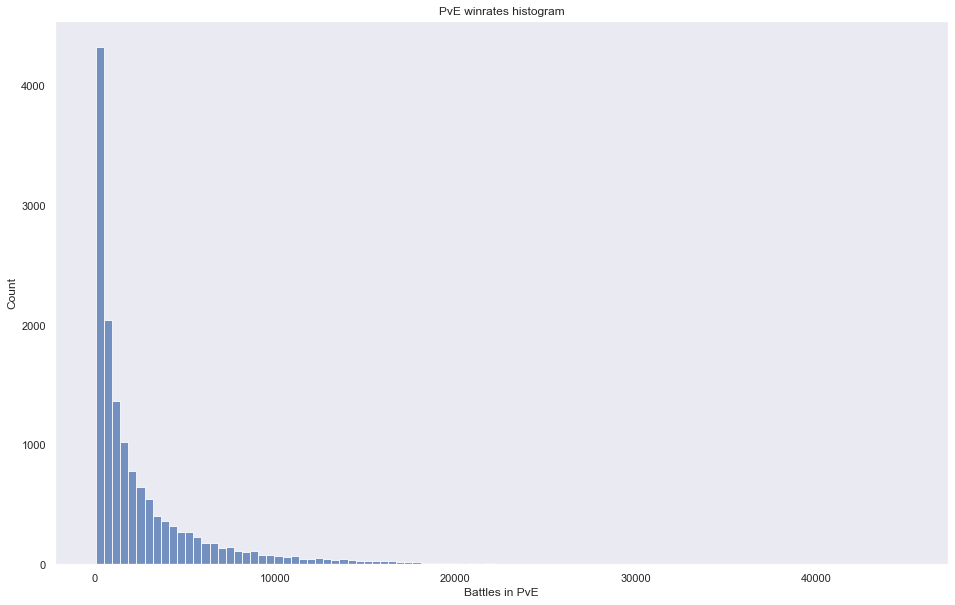

In [58]:
plt.figure(figsize=(16, 10))
battles_pve_hist = sns.histplot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1', bins=100)
battles_pve_hist.set_title('PvE winrates histogram')
battles_pve_hist.set_xlabel('Battles in PvE')
battles_pve_hist.grid(False)

Хорошо заметно, что подавляющее большинство сыграло менее 10к боев. А давайте более подробно посмотрим на гистограмму игроков, отыгравших меньше 10к боев

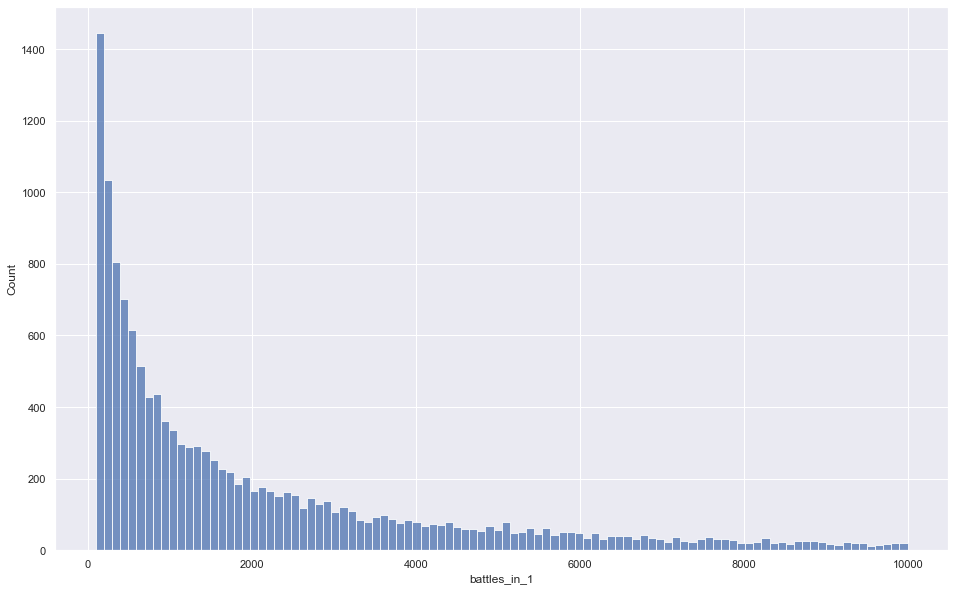

In [60]:
plt.figure(figsize=(16, 10))
battles_pve_less_10k_hist = sns.histplot(data=player_that_have_more_than_1k_battles_in_pve.loc[player_that_have_more_than_1k_battles_in_pve['battles_in_1'] < 10000], x='battles_in_1', bins=100)

Как видно, очень много игроков перестают играть после первых нескольких сотен боёв, вероятно это связанно со скучностью игры в режим: думаю много кто согласится с тем, что однообразное поведение ботов, и один и тот же сценарий большинства PvE миссий очень быстро наскучивает.

Давайте посмотрим, сколько же игроков сыграли в PvE меньше 2к боев

In [59]:
player_that_have_more_than_1k_battles_in_pve.loc[player_that_have_more_than_1k_battles_in_pve['battles_in_1'] < 2000].describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,8956.000000,8956.000000,8956.000000,8956.000000,8956.000000,8956.000000,8956.000000,8956.000000,8956.000000,8956.000000
mean,3027.492854,403.498042,0.729651,1540.458358,49.222611,728.582626,9065.625413,76.274062,2248.426262,5.772700
std,4899.680953,153.040040,0.402214,971.684112,4.964378,529.267454,4770.885435,9.329019,1015.612182,1.633809
min,101.000000,48.801205,0.010000,39.650000,27.700000,101.000000,125.470000,6.100000,86.358779,0.300000
25%,347.000000,293.739656,0.430000,847.775000,46.300000,272.000000,5408.737500,71.075000,1511.909522,4.680000
50%,1063.000000,373.513667,0.670000,1299.945000,49.000000,573.500000,8108.955000,77.300000,2082.721409,5.780000
75%,3456.250000,489.735916,0.960000,1977.760000,51.700000,1103.000000,12082.137500,82.900000,2786.831505,6.850000
max,50194.000000,1555.478197,4.470000,6506.210000,99.400000,1999.000000,31684.680000,98.100000,8577.955142,15.700000


Как видно, таких аккаунтов почти 9 тысяч, а самое интересное, что их же нельзя назвать и заядлыми PvP-шниками: среднее значение количества боев в PvP равняется трем тысячам. Может, они играют в столкач,а может это просто мертвые аккаунты, прямо сейчас проверить это не получиться.

****

## Давайте посмотрим, что может повлиять на винрейт

### Корреляция винрейта от количества боёв

Text(0, 0.5, 'Winrate in PvE')

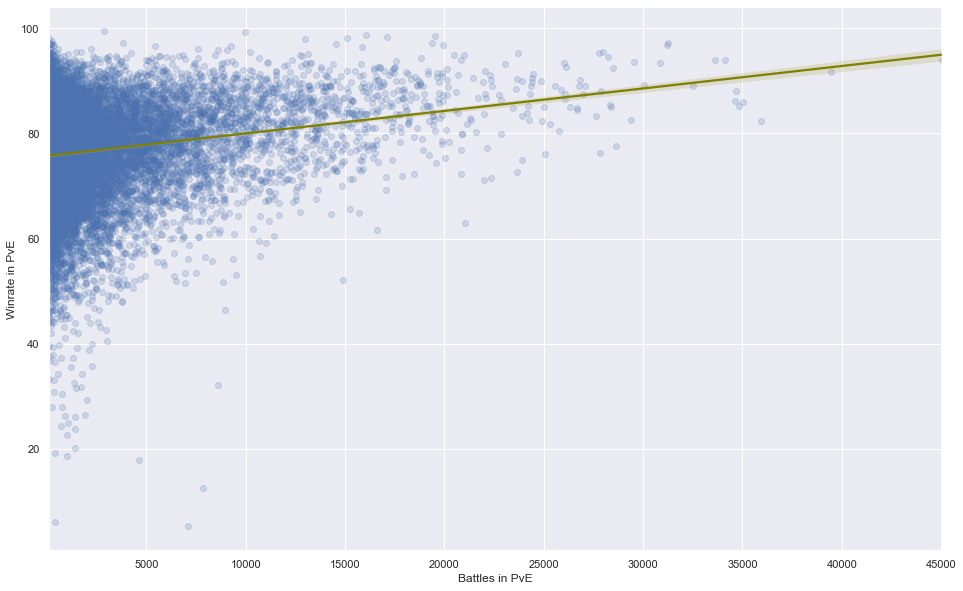

In [61]:
plt.figure(figsize=(16, 10))
winrate_to_battles_plot = sns.regplot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1', y='winrate_in_1', scatter_kws={'alpha': 0.2}, line_kws={'color': 'olive'})
winrate_to_battles_plot.set_xlabel('Battles in PvE')
winrate_to_battles_plot.set_ylabel('Winrate in PvE')

*Вопреки моим ожиданиям, винрейт растет с количеством боёв*

### Корреляция среднего урона от количества боёв

Text(0, 0.5, 'Damage in PvE')

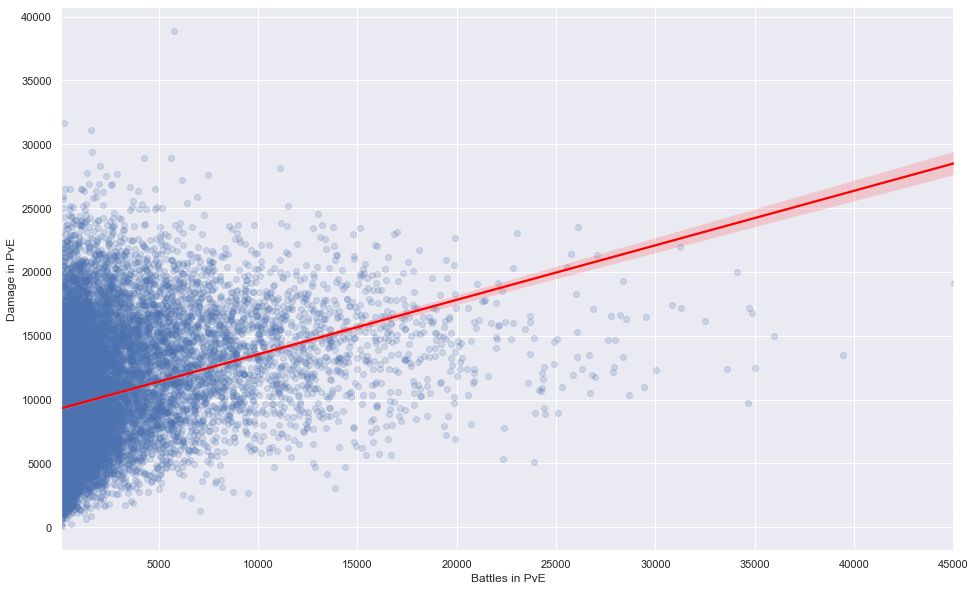

In [62]:
plt.figure(figsize=(16, 10))

damage_to_battles_pve = sns.regplot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1', y='dmg_in_1',scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
damage_to_battles_pve.set_xlabel('Battles in PvE')
damage_to_battles_pve.set_ylabel('Damage in PvE')

*Да и в случае с средним уроном заметна тенденция роста, хотя в моем понимании, человек тем слабее, чем больше у него боев в PvE*

### Корреляция фрагов от среднего урона

Ну и давайте, ради интереса, посмотрим на корреляцию количетсва фрагов от среднего урона

Text(0, 0.5, 'Average kills in PvE')

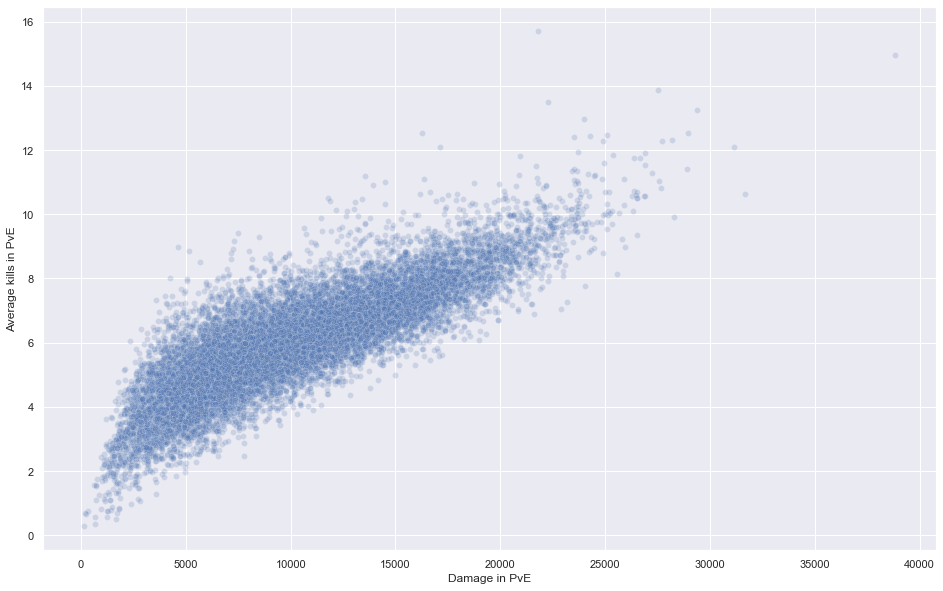

In [63]:
plt.figure(figsize=(16, 10))
damage_to_kills = sns.scatterplot(data=player_that_have_more_than_1k_battles_in_pve, x='dmg_in_1', y='kills_in_1', alpha=0.2)
damage_to_kills.set_xlabel('Damage in PvE')
damage_to_kills.set_ylabel('Average kills in PvE')

****

**Подготовка данных для анализа PvE задротов**

In [66]:
player_that_have_more_than_10k_battles_in_pve = dataframe.loc[(dataframe['battles_in_1'] > dataframe['battles_in_0']) & (dataframe['battles_in_0'] > 100)]

_________________

## Анализ "задротов" PvE

Итак, последний на сегодня датафрейм: люди, отыгравшие в PvE боев больше, чем в PvP:

In [67]:
player_that_have_more_than_10k_battles_in_pve.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000
mean,1036.872083,358.081099,0.681451,1294.071311,48.500408,4386.199466,10397.969859,77.752207,2449.806870,6.109041
std,1561.888326,117.594262,0.437747,762.047096,5.361174,4801.108097,4751.104732,8.636098,989.328996,1.644287
min,101.000000,19.670846,0.030000,57.240000,27.700000,106.000000,664.660000,5.400000,143.910568,0.340000
25%,213.000000,276.729775,0.370000,741.937500,45.400000,1075.000000,6675.642500,72.600000,1699.847033,5.020000
50%,459.000000,340.712464,0.590000,1131.865000,48.000000,2662.000000,9977.645000,78.600000,2330.795475,6.150000
75%,1182.000000,421.899756,0.880000,1662.362500,51.100000,5941.750000,13715.220000,83.800000,3071.700835,7.230000
max,26466.000000,1134.928934,4.030000,6405.800000,99.400000,45041.000000,31152.020000,99.400000,6803.411111,15.700000


Начнем с лайтового: посмотрим сколько вообще PvP боев отыграли эти ребятки:

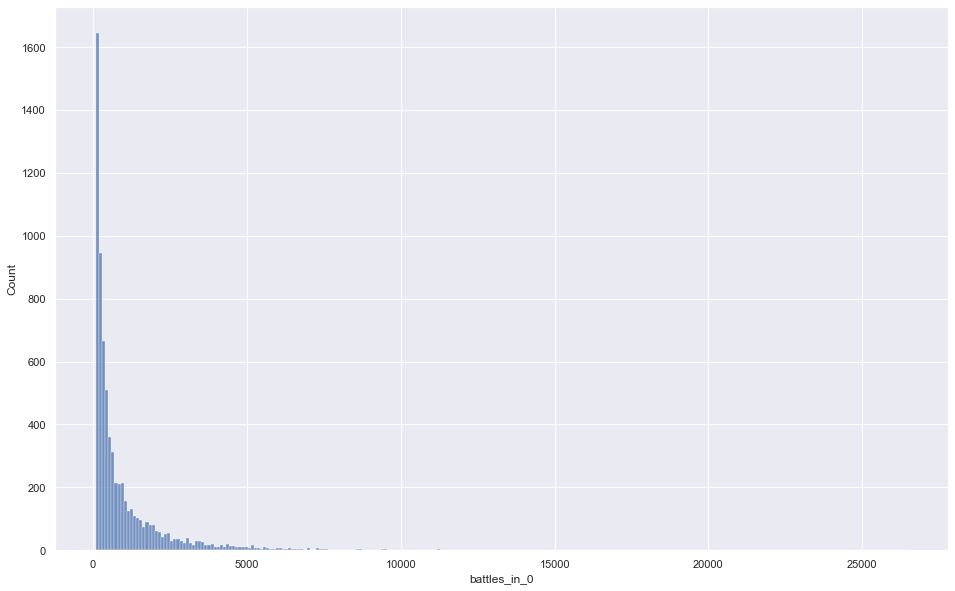

In [68]:
plt.figure(figsize=(16, 10))
pve_players_hist = sns.histplot(data=player_that_have_more_than_10k_battles_in_pve, x='battles_in_0')

Мда, большинство сыграло пару сотен игр, давайте дополнительно отфильтруем датасет так, чтобы у игроков была хотя бы тысяча PvP боев

In [70]:
pve_players_more_1k_in_pvp = player_that_have_more_than_10k_battles_in_pve.loc[player_that_have_more_than_10k_battles_in_pve['battles_in_0'] > 1000]
pve_players_more_1k_in_pvp.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,2689.248657,409.683493,0.833698,1636.771812,50.085393,7187.239375,12875.359907,78.443820,2953.063611,6.750327
std,2122.245172,124.476165,0.462061,828.163816,4.395177,5432.568015,4389.661692,8.690596,964.051988,1.553467
min,1001.000000,61.955987,0.070000,137.420000,37.100000,1037.000000,1819.450000,17.900000,453.077564,0.850000
25%,1389.000000,319.115469,0.485000,1008.545000,47.200000,3205.500000,9593.245000,73.400000,2243.208764,5.700000
50%,1963.000000,393.205842,0.770000,1500.840000,49.500000,5607.000000,12886.490000,79.500000,2907.348020,6.830000
75%,3191.500000,482.263701,1.080000,2128.945000,52.200000,9611.000000,15987.100000,84.700000,3583.169662,7.810000
max,26466.000000,1134.928934,3.280000,5408.510000,73.800000,39455.000000,28911.560000,99.400000,6779.270871,11.520000


Их стало еще меньше, чуть больше 2к, но, думаю, для гистограммы этого хватит

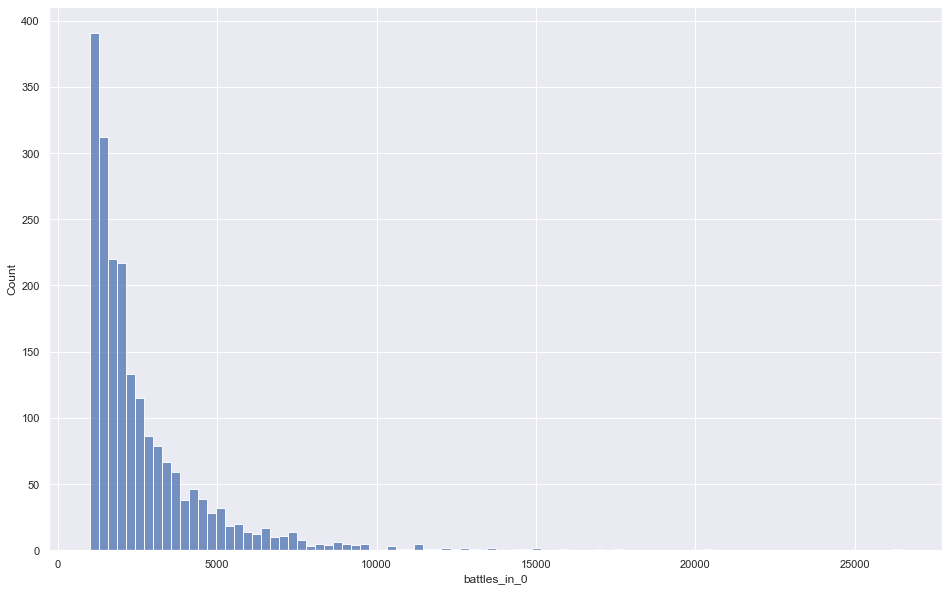

In [71]:
plt.figure(figsize=(16, 10))
pve_players_more_1k_in_pvp_hist = sns.histplot(data=pve_players_more_1k_in_pvp, x='battles_in_0')

### Корреляция винрейта в PvP от количества боёв в PvE

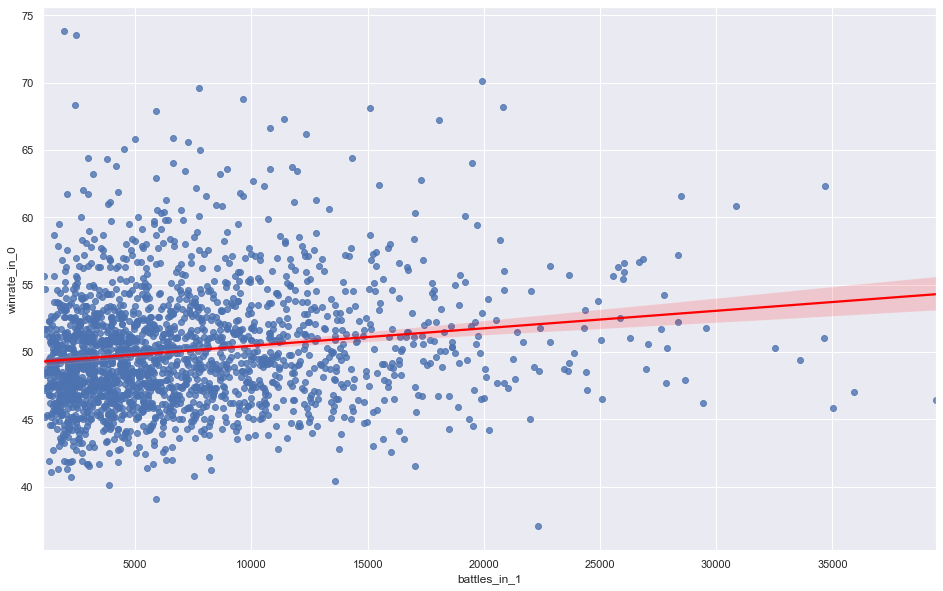

In [77]:
plt.figure(figsize=(16, 10))
pvp_wr_and_pve_battles_correlaction_hist = sns.regplot(data=pve_players_more_1k_in_pvp, x='battles_in_1', y='winrate_in_0', line_kws={'color': 'red'}) 

*Хмм, вопреки мнению большинства, линия регрессии растет, т.е чем больше у игрока PvE, тем больше должен быть его PvP-винрейт*

**Дабы полностью решить этот вопрос, давайте проанализируем еще и средний урон в PvP**


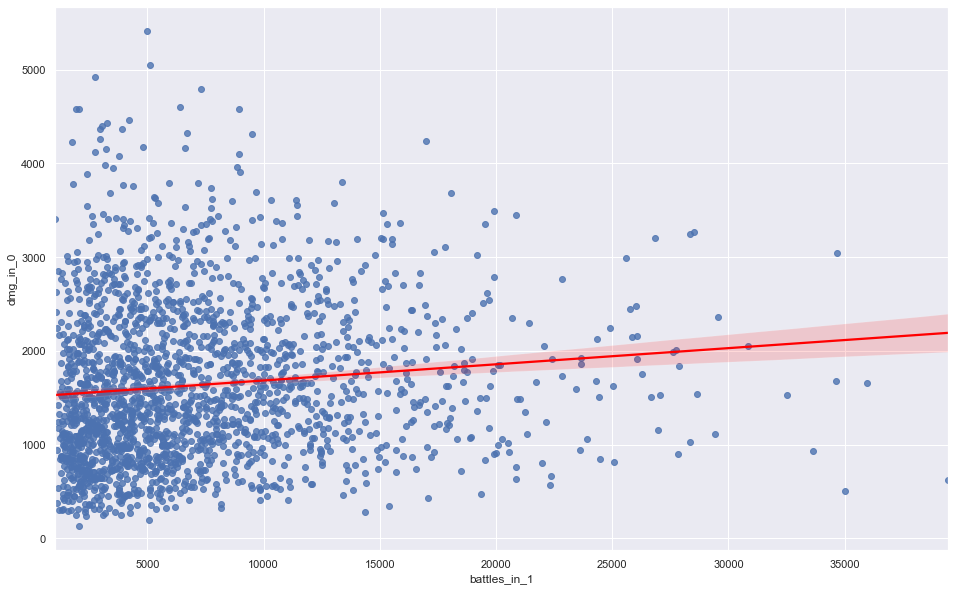

In [78]:
plt.figure(figsize=(16, 10))
pvp_wr_and_pve_battles_correlaction_hist = sns.regplot(data=pve_players_more_1k_in_pvp, x='battles_in_1', y='dmg_in_0', line_kws={'color': 'red'}) 

*Опять виден рост PvP-урона с ростом количестваа PvE-боёв, но цифры урона здесь совсем скромные, лишь пара десятком человек имеет 4к+ PvP урона*